Topic:        Challenge Set 3

Subject:      Pandas Challenges

Date:         1/22/2018

Name:         Brian Kim

Worked with:  Sungwan Kim

In [210]:
import numpy as np
import pandas as pd

from sklearn import linear_model, datasets
import statsmodels.api as sm
%matplotlib inline
import matplotlib.pyplot as pyplot

from matplotlib import pyplot as plt


In [211]:
df = pd.read_csv("~/nyc18_ds14/challenges/challenges_data/2013_movies.csv")

In [212]:
##Preliminary data cleaning
##rename columns, shorten values that appear in millions; 
df.columns = df.columns.str.lower()
df['gross'] = df['domestictotalgross']
df.releasedate = pd.to_datetime(df.releasedate)#.dt.strftime('%m/%d')
df['m_budget'] = df['budget'] * .000001
df['gross_in_millions'] = df['domestictotalgross'] * .000001

In [213]:
df.drop(['budget'], axis = 1, inplace = True)

**Challenge 1**

Plot domestic total gross over time.

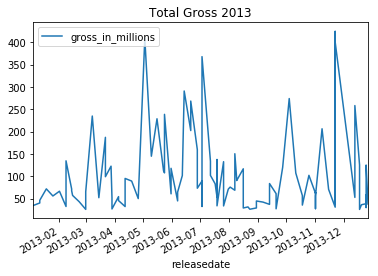

In [214]:
df.set_index('releasedate').plot(y='gross_in_millions',\
                                 title ="Total Gross 2013" )

**Challenge 2**

Plot runtime vs. domestic total gross.


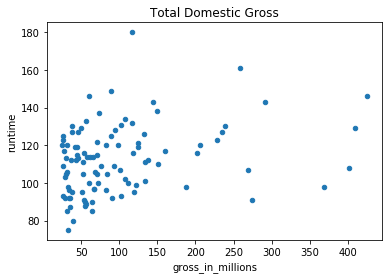

In [199]:
df.plot(kind = 'scatter', x= 'gross_in_millions',\
        y = 'runtime',title="Total Domestic Gross")

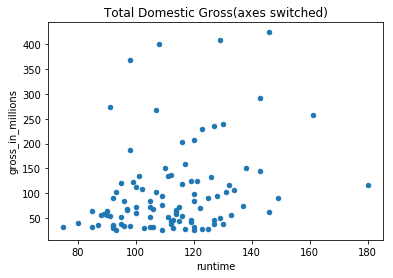

In [217]:
df.plot(kind = 'scatter', x= 'runtime', y = 'gross_in_millions',\
        title="Total Domestic Gross(axes switched)")

**Challenge 3**

Group your data by Rating and find the average runtime and domestic total gross at each level of Rating.
   ** There was only one G rated movie in dataset and therefore did not plot. **

In [218]:
df.groupby(['rating'])[['runtime', 'gross_in_millions']].mean().round(2)

,runtime,gross_in_millions
rating,,
G,107.00,268.49
PG,99.93,131.14
PG-13,117.51,111.45
R,110.73,69.89


In [216]:
df.rating.value_counts()



PG-13    47
R        37
PG       15
G         1
Name: rating, dtype: int64

**Challenge 4**
 
Make one figure with (N=the number of MPAA ratings there are) subplots, and in each plot the release date vs the domestic total gross.


In [193]:
df.reset_index

<bound method DataFrame.reset_index of                                     title  domestictotalgross  \
0         The Hunger Games: Catching Fire           424668047   
1                              Iron Man 3           409013994   
2                                  Frozen           400738009   
3                         Despicable Me 2           368061265   
4                            Man of Steel           291045518   
5                                 Gravity           274092705   
6                     Monsters University           268492764   
7     The Hobbit: The Desolation of Smaug           258366855   
8                        Fast & Furious 6           238679850   
9               Oz The Great and Powerful           234911825   
10                Star Trek Into Darkness           228778661   
11                   Thor: The Dark World           206362140   
12                            World War Z           202359711   
13                             The Croods          

/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_base.py:2918: UserWarning: Attempting to set identical left==right results
in singular transformations; automatically expanding.
left=735040.0, right=735040.0
  'left=%s, right=%s') % (left, right))


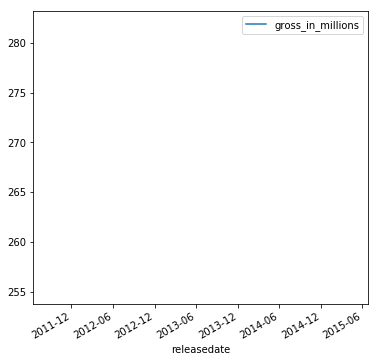

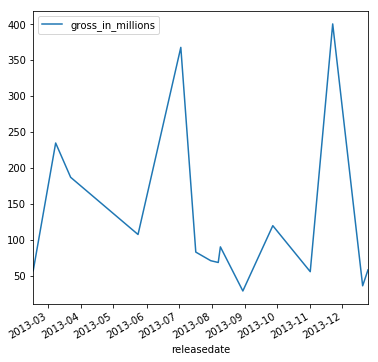

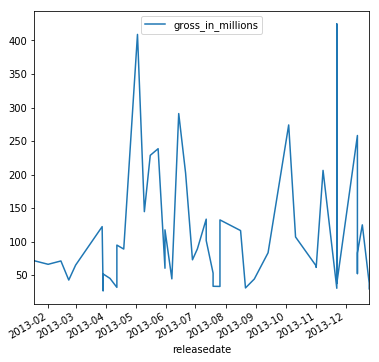

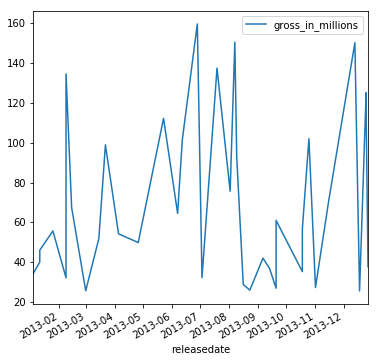

In [174]:
df.groupby(['rating']).plot( x= 'releasedate', y = 'gross_in_millions',\
                            subplots=True, figsize=(6, 6));


**Challenge 5**

What director in your dataset has the highest gross per movie?



In [204]:
df_max = df.groupby(['director'])[['gross_in_millions']].mean().\
            sort_values('gross_in_millions',ascending = False)
df_max.iloc[0]


gross_in_millions    424.668047
Name: Francis Lawrence, dtype: float64

**Challenge 6**

Bin your dataset into months and make
a bar graph of the mean domestic total
gross by month. Error bars will represent 
the standard error of the mean.

In [206]:
df = df.set_index('releasedate')

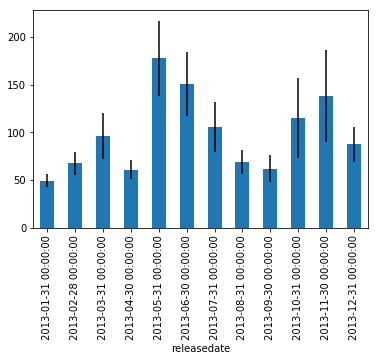

In [207]:
sd =df.groupby(pd.Grouper(freq='M')).gross_in_millions.sem()

df.groupby(pd.Grouper(freq='M')).gross_in_millions.\
    mean().plot(kind='bar', yerr=sd)